# Setting

In [ ]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

In [ ]:
#필요한 패키지 불러오기
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objects as go
from plotly.subplots import make_subplots
plt.rc('font', family='NanumGothic') 
sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False})
import numpy as np
import pandas as pd

In [ ]:
#google colab 환경에서 실행하기 위해 드라이브와 연결
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/장학금데이터분석/'

In [ ]:
data = pd.read_excel(path + '장학금데이터_final.xlsx', ) #데이터팀과 함께 수집한 장학금 데이터

In [ ]:
data

,장학금코드,장학금명,장학재단명,지급성적기준,사용여부,지급사유코드,지급사유,장학금출처,조교장학금여부(Y/N),지급형태구분,신입생,석사,박사,석박사 통합,외국인,연령제한(석사),연령제한(박사),이중수혜,휴학,수료,지원기간,등록금,입학금,"기타(생활비, 연구비, 학습지원비)",지원서,자기소개서,추천서,증빙서류,어학증명서,활동 및 자격증,주민등록등본,가족관계증명서,성적증명서,소득기준,우선선발,소득기준.1,우선선발.1,기타
0,NaN,NaN,NaN,평점 4.5 만점 기준,0: 성적기준 미사용\n1: 성적기준 사용,1: 성적우수\n2: 가계곤란\n3: 보훈대상(반액)\n4: 간부학생\n5: 기타\...,NaN,0: 교내\n1: 교외,0: 조교 장학금\n1: 조교 장학금 아님,1: 월별지급\n2: 학기별지급\n3: 학년별지급\n4: 1회성지급,0: 지원 가능하지 않음\n1: 지원 가능함,NaN,NaN,NaN,NaN,0: 연령제한 없음\n1: 연령제한 있음,NaN,0: 이중수혜 불가능\n1: 이중수혜 조건부 가능\n2: 이중수혜 가능,0: 지원 불가\n1: 지원 가능,NaN,0: 한 학기\n1: 1년\n2: 전체 학기,0: 지원 없음\n1: 일부 지원\n2: 전액 지원,NaN,NaN,0: 필요 없음\n1: 필요함,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0: 없음\n1: 있음,0: 기준 없음\n1: 기준 있음,NaN
1,11340.0,안암연계장학금,대학원행정팀,해당사항없음,0.0,1.0,성적우수,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"제출서류 : 학부장학금수헤증명서, 대학원합격통지서"
2,11947.0,대학원소망장학금,대학원행정팀,해당사항없음,0.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"개인정보동의서, 장애인증명서, 기타가계상황을 증명할 수 있는 서류"
3,11948.0,학자금대출이자지원장학금,대학원행정팀,해당사항없음,0.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,11814.0,졸업특대생장학금,대학원행정팀,해당사항없음,0.0,1.0,성적우수,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
5,12819.0,기금장학금(송백재단),송백재단,해당사항없음,0.0,2.0,가계곤란,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
6,13087.0,KU희망장학금,대학원행정팀,3.8,1.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,소득 기준 우선 선발 요건
7,13129.0,학석사연계과정장학금,대학원행정팀,해당사항없음,0.0,5.0,기타(조기졸업),0.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
8,13904.0,외국인글로벌리더장학금,대학원행정팀,4.0,1.0,1.0,성적우수,0.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
9,14149.0,기금장학금(반도체),삼성전자(주관 : 공과대학행정실),해당사항없음,0.0,1.0,성적우수,1.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [ ]:
# 불필요한 셀들 정리
data = data.drop(0, axis=0)
data = data.drop(labels=range(40, 52), axis=0)
data = data.drop(['기타'], axis=1)
data = data.dropna(axis=0)

In [ ]:
change_dict = {'해당사항없음':0}
data = data.replace({'지급성적기준':change_dict})

In [ ]:
data

,장학금코드,장학금명,장학재단명,지급성적기준,사용여부,지급사유코드,지급사유,장학금출처,조교장학금여부(Y/N),지급형태구분,신입생,석사,박사,석박사 통합,외국인,연령제한(석사),연령제한(박사),이중수혜,휴학,수료,지원기간,등록금,입학금,"기타(생활비, 연구비, 학습지원비)",지원서,자기소개서,추천서,증빙서류,어학증명서,활동 및 자격증,주민등록등본,가족관계증명서,성적증명서,소득기준,우선선발,소득기준.1,우선선발.1
1,11340.0,안암연계장학금,대학원행정팀,0.0,0.0,1.0,성적우수,0.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11947.0,대학원소망장학금,대학원행정팀,0.0,0.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11948.0,학자금대출이자지원장학금,대학원행정팀,0.0,0.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,12819.0,기금장학금(송백재단),송백재단,0.0,0.0,2.0,가계곤란,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,13087.0,KU희망장학금,대학원행정팀,3.8,1.0,2.0,가계곤란,0.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
7,13129.0,학석사연계과정장학금,대학원행정팀,0.0,0.0,5.0,기타(조기졸업),0.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,13904.0,외국인글로벌리더장학금,대학원행정팀,4.0,1.0,1.0,성적우수,0.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,14654.0,안암연계장학금학업보조비,대학원행정팀,0.0,0.0,1.0,성적우수,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,13609.0,기금장학금(고려대교우회),고려대학교교우회,3.0,1.0,1.0,성적우수,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
13,14466.0,기금장학금(현대차글로벌),현대차정몽구재단,3.7,1.0,1.0,성적우수,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = data.iloc[:,:28] #불필요하다고 판단되는 변수들 삭제
data_final = data.drop(['장학금코드', '장학금명', '지급사유', '조교장학금여부(Y/N)'], axis=1) #분석에 사용되지 않는 변수들 삭제
data_final

,장학재단명,지급성적기준,사용여부,지급사유코드,장학금출처,지급형태구분,신입생,석사,박사,석박사 통합,외국인,연령제한(석사),연령제한(박사),이중수혜,휴학,수료,지원기간,등록금,입학금,"기타(생활비, 연구비, 학습지원비)",지원서,자기소개서,추천서,증빙서류
1,대학원행정팀,0.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
2,대학원행정팀,0.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,대학원행정팀,0.0,0.0,2.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,송백재단,0.0,0.0,2.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
6,대학원행정팀,3.8,1.0,2.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
7,대학원행정팀,0.0,0.0,5.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0
8,대학원행정팀,4.0,1.0,1.0,0.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,1.0,0.0
10,대학원행정팀,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12,고려대학교교우회,3.0,1.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0
13,현대차정몽구재단,3.7,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,1.0


In [ ]:
final_df = data_final.drop(['지급성적기준'], axis=1).astype('object') #지급성적기준을 제외하고는 범주형 변수이므로 타입 변경

In [ ]:
final_df.insert(1, "지급성적기준", data_final['지급성적기준'].values)

In [ ]:
## 범주형 변수 원핫 인코딩
categorical = final_df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 원핫 인코딩된 범주형 변수와 scale을 맞춰주기 위해 수치형 변수에 minmax scaling 진행
numerical = final_df.select_dtypes(exclude='object')
scaled_data = MinMaxScaler().fit_transform(numerical)

In [ ]:
categorical.insert(0, "지급성적기준", scaled_data)

In [ ]:
categorical #최종 데이터

,지급성적기준,장학재단명_고려대학교교우회,장학재단명_글로벌서비스센터,장학재단명_대학원행정팀,장학재단명_삼일문화재단,장학재단명_송백재단,장학재단명_송원김영환장학재단,장학재단명_아산사회복지재단,장학재단명_인재양성팀,장학재단명_현대차정몽구재단,사용여부_0.0,사용여부_1.0,지급사유코드_1.0,지급사유코드_2.0,지급사유코드_5.0,지급사유코드_6.0,장학금출처_0.0,장학금출처_1.0,지급형태구분_1.0,지급형태구분_2.0,지급형태구분_4.0,신입생_0.0,신입생_1.0,석사_0.0,석사_1.0,박사_0.0,박사_1.0,석박사 통합_0.0,석박사 통합_1.0,외국인_0.0,외국인_1.0,연령제한(석사)_0.0,연령제한(석사)_1.0,연령제한(박사)_0.0,연령제한(박사)_1.0,이중수혜_0.0,이중수혜_1.0,이중수혜_2.0,휴학_0.0,수료_0.0,수료_1.0,지원기간_0.0,지원기간_1.0,지원기간_2.0,등록금_0.0,등록금_1.0,등록금_2.0,입학금_0.0,입학금_2.0,"기타(생활비, 연구비, 학습지원비)_0.0","기타(생활비, 연구비, 학습지원비)_1.0",지원서_0.0,지원서_1.0,자기소개서_0.0,자기소개서_1.0,추천서_0.0,추천서_1.0,증빙서류_0.0,증빙서류_1.0
1,0.000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1
2,0.000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1
3,0.000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0
5,0.000,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1
6,0.950,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,1
7,0.000,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1
8,1.000,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,1,1,0,0,1,1,0,0,1,1,0
10,0.000,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1
12,0.750,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1
13,0.925,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1


# UMAP 시각화

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 4.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=8ce69e1c4bff6d64278cf367e5bbaa9ca0702a3ab59b9f71b590e66b3a16a964
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=3c0b7a468f813348dacd2eba6dd706eea5eaf2110feed0e91681faf66fd25c9b
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap

In [ ]:
reducer = umap.UMAP(random_state=41)

In [ ]:
embedding = reducer.fit_transform(categorical)
embedding.shape

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



(21, 2)

In [ ]:
umap_df = pd.DataFrame(embedding)
umap_df['label'] = data['장학금명'].values

In [ ]:
fig = px.scatter(x=umap_df.loc[:,0], y=umap_df.loc[:,1], text=umap_df['label'], template='simple_white')
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
    )
fig.show()

# Clustering

## PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
categorical.index = data['장학금명']

In [ ]:
pca = PCA(n_components=21) #21개의 주성분 확인
pca_array = pca.fit_transform(categorical)
pca_df = pd.DataFrame(pca_array, index=categorical.index,
                      columns=[f"pca{num+1}" for num in range(categorical.shape[0])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21
장학금명,,,,,,,,,,,,,,,,,,,,,
안암연계장학금,0.282950,1.827156,1.447202,1.094384,-0.632001,0.054991,-0.781181,-0.642587,0.489633,-0.367599,-0.046944,0.294389,0.089002,0.540394,-0.015395,-0.152997,0.351792,-0.208837,0.066702,-0.082412,1.745281e-16
대학원소망장학금,-1.613053,-0.620128,-0.394028,-0.260280,0.150162,-0.388872,-0.570418,-0.923070,-0.399444,-0.821631,-0.041320,-0.079519,0.287716,-0.156533,-0.194115,0.032580,0.029824,0.420172,-0.073448,-0.191376,1.745281e-16
학자금대출이자지원장학금,-1.713348,-0.619276,-0.472322,-1.038567,0.278755,-0.353399,0.185201,-0.659552,0.349318,-0.236321,-0.581661,0.245890,-0.123211,-0.444249,0.361552,-0.592417,-0.017174,-0.138615,0.174561,0.111614,1.745281e-16
기금장학금(송백재단),-1.392830,-1.816270,-0.074332,-0.172220,-0.060200,-0.683476,-0.180308,-0.157627,-0.061005,0.324155,-0.863812,0.143235,-0.226213,0.262081,0.126151,0.731708,0.157116,-0.089971,0.029209,0.074106,1.745281e-16
KU희망장학금,-0.514698,-0.952768,-0.021941,-1.049843,1.712178,0.785987,-0.367782,-0.573661,0.076007,0.302326,0.531535,-0.078640,0.304258,0.501891,-0.017272,0.024918,-0.256100,-0.252236,-0.108668,-0.041304,1.745281e-16


In [ ]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(categorical.shape[0])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,2.195689e+00,2.432857e-01,0.243286
pca2,1.740124e+00,1.928084e-01,0.436094
pca3,9.919593e-01,1.099106e-01,0.546005
pca4,9.235487e-01,1.023306e-01,0.648335
pca5,5.235682e-01,5.801216e-02,0.706347
pca6,4.988738e-01,5.527598e-02,0.761623
pca7,3.517068e-01,3.896965e-02,0.800593
pca8,3.432521e-01,3.803285e-02,0.838626
pca9,3.002629e-01,3.326959e-02,0.871896
pca10,2.649630e-01,2.935831e-02,0.901254


In [ ]:
reduced_data = pca_df.iloc[:,:3] #3차원으로 축소
reduced_data

,pca1,pca2,pca3
장학금명,,,
안암연계장학금,0.282950,1.827156,1.447202
대학원소망장학금,-1.613053,-0.620128,-0.394028
학자금대출이자지원장학금,-1.713348,-0.619276,-0.472322
기금장학금(송백재단),-1.392830,-1.816270,-0.074332
KU희망장학금,-0.514698,-0.952768,-0.021941
학석사연계과정장학금,-0.385254,2.095218,-0.219874
외국인글로벌리더장학금,1.461776,1.899179,-0.707402
안암연계장학금학업보조비,-1.070348,0.603093,1.960411
기금장학금(고려대교우회),2.142838,-1.577209,-1.631831


## Hierarchical clustering

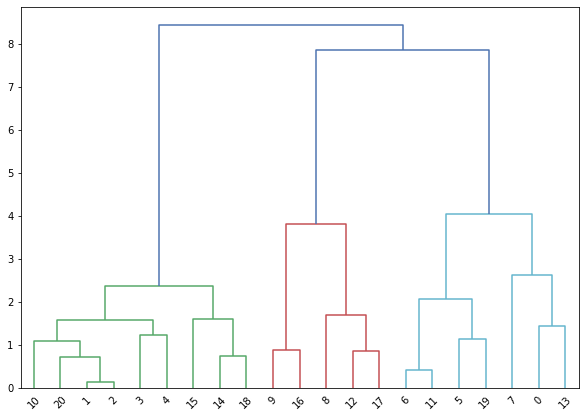

In [ ]:
import scipy.cluster.hierarchy as shc #적절한 군집 개수 파악을 위해 덴드로그램을 그려봄

plt.figure(figsize=(10, 7))
plt.style.use("default")
dend = shc.dendrogram(shc.linkage(reduced_data, method='ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(reduced_data)

array([0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 0, 1])

In [ ]:
reduced_data['cluster'] = cluster.fit_predict(reduced_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reduced_data

,pca1,pca2,pca3,cluster
장학금명,,,,
안암연계장학금,0.282950,1.827156,1.447202,0
대학원소망장학금,-1.613053,-0.620128,-0.394028,1
학자금대출이자지원장학금,-1.713348,-0.619276,-0.472322,1
기금장학금(송백재단),-1.392830,-1.816270,-0.074332,1
KU희망장학금,-0.514698,-0.952768,-0.021941,1
학석사연계과정장학금,-0.385254,2.095218,-0.219874,0
외국인글로벌리더장학금,1.461776,1.899179,-0.707402,0
안암연계장학금학업보조비,-1.070348,0.603093,1.960411,0
기금장학금(고려대교우회),2.142838,-1.577209,-1.631831,2


In [ ]:
fig = px.scatter_3d(reduced_data, x='pca1', y='pca2', z='pca3',
              color='cluster', width=900, height=500)
fig.update_traces(hovertext=reduced_data.index, selector=dict(type='scatter3d'))
fig.show() #3차원 시각화

In [ ]:
umap_df['cluster'] = reduced_data['cluster'].values
umap_df = umap_df.astype({'cluster':'object'})

In [ ]:
#2차원 시각화
fig = px.scatter(x=umap_df.loc[:,0], y=umap_df.loc[:,1], text=umap_df['label'], template='simple_white', color=umap_df['cluster'])
fig.update_layout(
    autosize=False,
    width=1000,
    height=800
    )
fig.show()

# 시기별 장학금 지급 형태 분석

In [ ]:
data = pd.read_excel(path + '수혜데이터_장학금명포함_총금액포함.xlsx') #수혜학생데이터

In [ ]:
year = [2017, 2018, 2019, 2020, 2021]
semester = ['1R', '2R']
total_list=[]
total_df = pd.DataFrame(index=range(0,10), columns=['년도','학기', '총금액'])
for i in year: #연도별
  for j in semester: #학기별
      df = data[(data['년도']==i) & (data['학기']==j)]
      if '교육조교(A)' in df['장학금명'].to_list():
        df = df[(df['장학금명']!='교육조교(A)') & (df['장학금명']!='연구조교(A)')] #연구조교와 교육조교는 2021년에만 포함되어 있어 다른 년도와 비교할 때 왜곡이 발생해서 제거
      df = df.groupby(['장학금명'])[['총금액']].sum().reset_index().sort_values('총금액', ascending=False) #장학금 총액 기준으로 내림차순 정렬
      total = df['총금액'].sum()
      df.loc[len(df)] = ['총합', total]
      total_list.append(total)
      fig = px.bar(df.iloc[:-1], x='장학금명', y='총금액', title=str(i)+'년 '+j)
      fig.show()
total_df['년도'] = [i for i in year for _ in range(2)]
total_df['학기'] = [i for _ in range(5) for i in semester]
total_df['총금액'] = total_list
fig = px.bar(total_df, x="년도", y="총금액", color='학기', barmode='group', title='시기별 장학금 총 지급액')
fig.show()

In [ ]:
year = [2017, 2018, 2019, 2020, 2021]
unique_student = [] #중복 제외한 수혜학생 수를 담을 리스트
case_list = [] #장학금 총 지급 건수를 담을 리스트
mean_list=[] #평균 장학금 지급액을 담을 리스트
unique_df = pd.DataFrame(index=range(0,5), columns = ['년도', '학생 수'])
case_df = pd.DataFrame(index=range(0,5), columns = ['년도', '지급 건수'])
mean_df = pd.DataFrame(index=range(0,5), columns=['년도', '평균지급금액'])
for i in year:
    df = data[data['년도']==i]
    if '교육조교(A)' in df['장학금명'].to_list():
      df = df[(df['장학금명']!='교육조교(A)') & (df['장학금명']!='연구조교(A)')]
    case = len(df)
    mean = df['총금액'].mean()
    student = len(df['학번'].unique())
    case_list.append(case)
    mean_list.append(mean)
    unique_student.append(student)
case_df['년도'] = [i for i in year]
case_df['지급 건수'] = case_list
unique_df['년도'] = [i for i in year]
unique_df['학생 수'] = unique_student
mean_df['년도'] = [i for i in year]
mean_df['평균지급금액'] = mean_list
fig = px.bar(case_df, x="년도", y="지급 건수", title='시기별 장학금 총 지급 건수')
fig.show()
fig = px.bar(unique_df, x="년도", y="학생 수", title='시기별 장학금 수혜 학생 수(중복 제외)')
fig.show()
fig = px.bar(mean_df, x='년도', y='평균지급금액', title='시기별 장학금 평균 지급 금액')
fig.show()

#학과별 장학금 지급 형태 분석

In [ ]:
major_code_list = data['학과코드'].unique().tolist() #학과 코드 리스트 저장
major_code_list[:5]

[4346, 327, 5115, 3443, 359]

In [ ]:
len(major_code_list) #총 121개의 학과 정보 존재

121

In [ ]:
# 예시로 5개 학과의 장학금 지급 형태 파이차트로 시각화
for i in major_code_list[:5]:
  df = data[data['학과코드']==i]
  df2 = pd.DataFrame(df['장학금명'].value_counts())
  fig = px.pie(df2, values='장학금명', names=df2.index, title=str(i)+'학과')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

#지도교수별 장학금 지급 형태 분석

In [ ]:
for i in major_code_list[:10]:
  df = data[data['학과코드']==i]
  df = df.groupby(['지도교수'])[['총금액']].sum().reset_index()
  fig = px.pie(df, values='총금액', names='지도교수', title=str(i)+'학과')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

## 편중이 존재하는 학과 추려내기

In [ ]:
special_major = [] #편중이 존재하는 학과를 저장할 리스트
for i in major_code_list:
  df = data[data['학과코드']==i]
  df = df.groupby(['지도교수'])[['총금액']].sum().reset_index().sort_values('총금액', ascending=False)
  total = df['총금액'].sum()
  df['비율'] = df.apply(lambda x: x['총금액'] / total * 100, axis = 1)
  if df.iloc[0,2] > 50: #한 교수가 차지하는 비중이 50%가 넘는 학과 뽑아냄
    special_major.append(i)
    fig = px.pie(df, values='총금액', names='지도교수', title=i)
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

In [ ]:
special_major

[3443,
 377,
 3439,
 3440,
 4973,
 4013,
 5575,
 3437,
 344,
 6428,
 5609,
 378,
 4018,
 6504,
 6088,
 4585,
 374,
 4975,
 3380,
 6614,
 6615,
 5318,
 6646,
 6766,
 6616,
 6683,
 6503,
 6877]

# 장학금 추천 알고리즘

## 빈도수 기준 Top5 장학금 추천

In [ ]:
def get_top5_freq(major_code):
  major = major_code
  df = data[data['학과코드']==major] #수혜학생 데이터에서 해당 학과 정보만 가져옴
  df2 = pd.DataFrame(df['장학금명'].value_counts()) #지급받은 장학금 빈도수 count
  total = df2['장학금명'].sum()
  df2['비율'] = df2.apply(lambda x: x['장학금명'] / total * 100, axis = 1) #장학금별 비율 계산
  if len(df['장학금명'].unique()) >= 5: #학과 내 장학금의 종류가 5개가 넘으면 상위5개 추천
    for i in range(5):
      answer = df2.index[i]
      percentage = round(df2['비율'].iloc[i],1)
      print(answer, ': 같은 과 장학금 수혜학생 중 약 ' + str(percentage) + '%가 해당 장학금을 받았어요!')
  else: #학과내 장학금의 종류가 5개가 안되면 1위부터 순서대로 모두 추천
    for i in range(len(df['장학금명'].unique())):
      answer = df2.index[i]
      percentage = round(df2['비율'].iloc[i],1)
      print(answer, ': 같은 과 장학금 수혜학생 중 약 ' + str(percentage) + '%가 해당 장학금을 받았어요!')

In [ ]:
get_top5_freq(5573)

대학원근로장학금 : 같은 과 장학금 수혜학생 중 약 30.1%가 해당 장학금을 받았어요!
정부초청장학금(입학금) : 같은 과 장학금 수혜학생 중 약 20.5%가 해당 장학금을 받았어요!
연구장려장학금 : 같은 과 장학금 수혜학생 중 약 20.5%가 해당 장학금을 받았어요!
대학원일반장학금 : 같은 과 장학금 수혜학생 중 약 19.3%가 해당 장학금을 받았어요!
기금장학금(현대차글로벌) : 같은 과 장학금 수혜학생 중 약 3.6%가 해당 장학금을 받았어요!


## 지급액 기준 Top5 장학금 추천

In [ ]:
def get_top5_amount(major_code):
  major = major_code
  df = data[data['학과코드']==major] #수혜학생 데이터에서 해당 학과 정보만 가져옴
  df2 = df.groupby(['장학금명']).mean() 
  df2 = df2.sort_values('총금액', ascending=False) #지급된 장학금별 총금액의 평균 내림차순 정렬
  if len(df['장학금명'].unique()) >= 5:
    for i in range(5):
      answer = df2.index[i]
      amount = int(round(df2['총금액'].iloc[i]))
      print(answer, ': 해당 장학금의 평균 수혜금액은 약 ' + str(amount) + '원이에요!')
  else:
    for i in range(len(df['장학금명'].unique())):
      answer = df2.index[i]
      amount = int(round(df2['총금액'].iloc[i]))
      print(answer, ': 해당 장학금의 평균 수혜금액은 약 ' + str(amount) + '원이에요!')

In [ ]:
get_top5_amount(5573)

기금장학금(현대차글로벌) : 해당 장학금의 평균 수혜금액은 약 13580667원이에요!
기금장학금(아산사회복지재단) : 해당 장학금의 평균 수혜금액은 약 5000000원이에요!
외국인자연공학계장학금 : 해당 장학금의 평균 수혜금액은 약 3845000원이에요!
대학원일반장학금 : 해당 장학금의 평균 수혜금액은 약 1250000원이에요!
정부초청장학금(입학금) : 해당 장학금의 평균 수혜금액은 약 1249882원이에요!
